# Project Foundations for Data Science: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# hook the drive with Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/DSML MIT/Project 1/foodhub_order.csv')

# returns the first 5 rows od the data
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

---



In [ ]:
# Return the number of rows and colums of the dataframe
print("The number of rows of the dataframe is:", df.shape[0])
print("The number of columns of the dataframe is:", df.shape[1])

The number of rows of the dataframe is: 1898
The number of columns of the dataframe is: 9


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [ ]:
# info() gives us a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:

The different columns of the data have attributes of different types: integer (*order_id*, *customer_id*, *food_preparation_time* and *delevery_time*), float (*cost_of_the_order*) and object(*restaurant_name, cuisine_type, day_of_the_week* and *rating*)




### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [ ]:
# The code df.isnull().sum() checks for missing values in each column of the DataFrame ‘df’ and returns the sum of null values for each column
print(df.isnull().sum())

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


#### Observations: *There are no missing values in the data. Indeed, the sum of missing values is zero for each column in the data.*


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [ ]:
# use describe() to print the statistical summary of the data
print(df.describe(include="all"))

            order_id    customer_id restaurant_name cuisine_type  \
count   1.898000e+03    1898.000000            1898         1898   
unique           NaN            NaN             178           14   
top              NaN            NaN     Shake Shack     American   
freq             NaN            NaN             219          584   
mean    1.477496e+06  171168.478398             NaN          NaN   
std     5.480497e+02  113698.139743             NaN          NaN   
min     1.476547e+06    1311.000000             NaN          NaN   
25%     1.477021e+06   77787.750000             NaN          NaN   
50%     1.477496e+06  128600.000000             NaN          NaN   
75%     1.477970e+06  270525.000000             NaN          NaN   
max     1.478444e+06  405334.000000             NaN          NaN   

        cost_of_the_order day_of_the_week     rating  food_preparation_time  \
count         1898.000000            1898       1898            1898.000000   
unique                NaN

#### Observations: once the order is placed, it takes a minimum of 20 minutes, an average of 27.37 minutes and a maximum of 35 minutes for food to be prepared.

### **Question 5:** How many orders are not rated?

In [ ]:
# .value_counts() count the number of each category on a categorical variable
df["rating"].value_counts()

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64



#### Observations: 736 orders have not been rated in the app by the customers.


### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

In [ ]:
#returns the number of unique values of each variable
df.nunique()

order_id                 1898
customer_id              1200
restaurant_name           178
cuisine_type               14
cost_of_the_order         312
day_of_the_week             2
rating                      4
food_preparation_time      16
delivery_time              19
dtype: int64

#### Distribution of continuous variables

#####1. Number of orders per customer





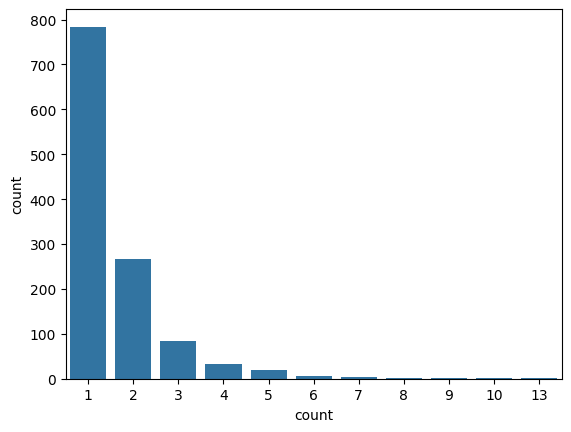

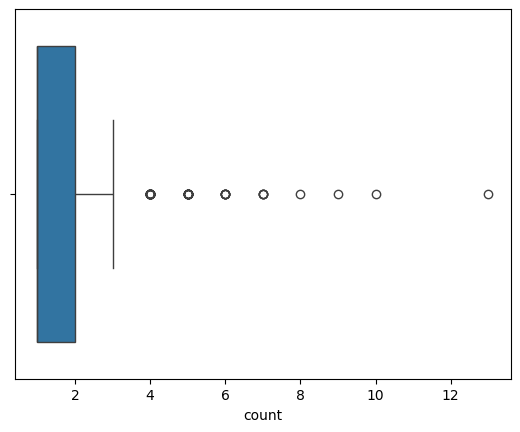

In [ ]:
# Number of orders per customer
sns.countplot(data=df,x=df['customer_id'].value_counts())
plt.show()
sns.boxplot(data=df,x=df['customer_id'].value_counts())
plt.show()


#### Observation:
* There are a total of 1200 unique customers in the data who have ordered among 1 to 13 times.
* Most of customers have only made a single order
* Outliers are customers with more than 3 orders



#####2. Cost of the order

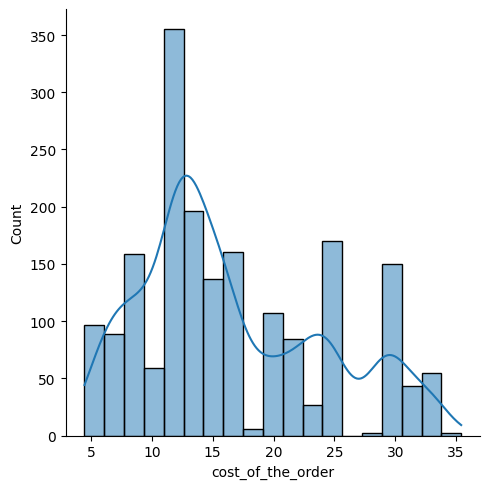

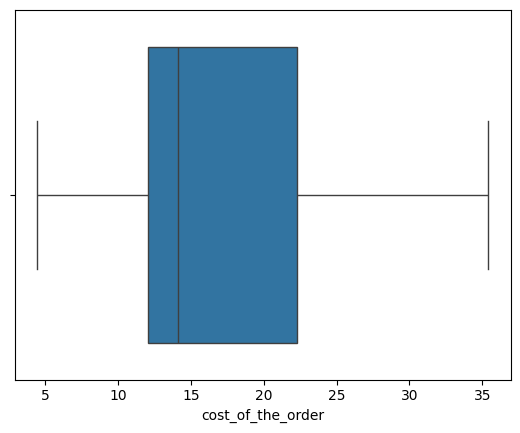

In [ ]:
# Histogram, displot and boxplot of cost_of_the_order
sns.displot(data=df, x=df['cost_of_the_order'], kde = True)
plt.show()
sns.boxplot(data=df, x='cost_of_the_order')
plt.show()


#### Observations:
* *The distribution is right skewed*
* *No outliers in this cost_of_the_order column.*
* *The range of the cost_of_the_order variable is (5, 35).*

#####3. Food preparation time

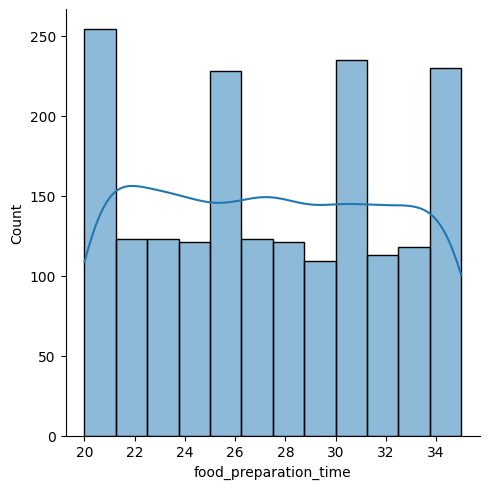

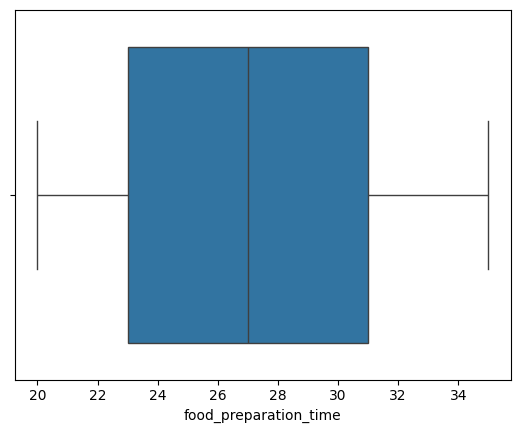

In [ ]:
# Histogram, displot and boxplot of food_preparation_time
sns.displot(data=df, x='food_preparation_time', kde = True)
plt.show()
sns.boxplot(data=df, x='food_preparation_time')
plt.show()

#### Observations:
* *The distribution seems to have no skew but if we are careful in calculating the length of the whiskers, we might notice that the left whisker (23 - 20=3) is smaller than the right whisker (35 - 31 = 4). So, based on this calculation, the distribution is right skewed.*
* *No outliers in this food_preparation_time column.*
* *The range of the food_preparation_time variable is (20, 35).*

#####4. **Delivery** time

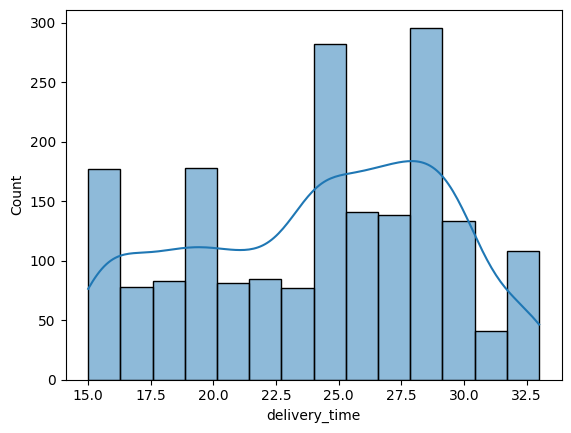

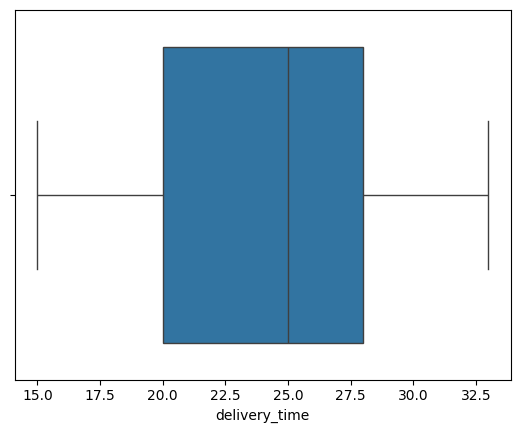

In [ ]:
# Histogram, displot and boxplot of food_preparation_time
sns.histplot(data=df, x='delivery_time', kde = True)
plt.show()
sns.boxplot(data=df, x='delivery_time')
plt.show()

#### Observations:
* *The distribution is left skewed.*
* *No outliers in this delivery_time column.*
* *The range of the delivery_time variable is (15, 32.5).*

#### Distribution of discrete variables

In [ ]:
# To create a barplot with percentage or count on top of each

# https://medium.com/@lakshmiprabharamesh1993/data-visualization-for-categorical-univariate-analysis-code-3b81ac99a969 slightly modified to show bars in descending order

def labeled_bar(data, feature, perc=False, n=None):
    """
    Returns a Barplot with percentage at the top
    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """
    total = data[feature].shape[0]  # total values of the columns
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=10)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n]#.sort_values(),  # create a count plot
    )

    for p in ax.patches:#loops through each patch
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage for each division of the category
        else:
            label = p.get_height()
        x = p.get_x() + p.get_width() / 2  # width  of plot
        y = p.get_height()  # height of plot

        ax.annotate(
            label,
            (x, y),
            size=12,
            xytext=(0, 5),
            ha="center",
            va="center",
            textcoords="offset points",
        )  # anotate the percentages

    plt.show()  # Finally show the plot

####1. Restaurant name

<ipython-input-15-cb7d85f4914f>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


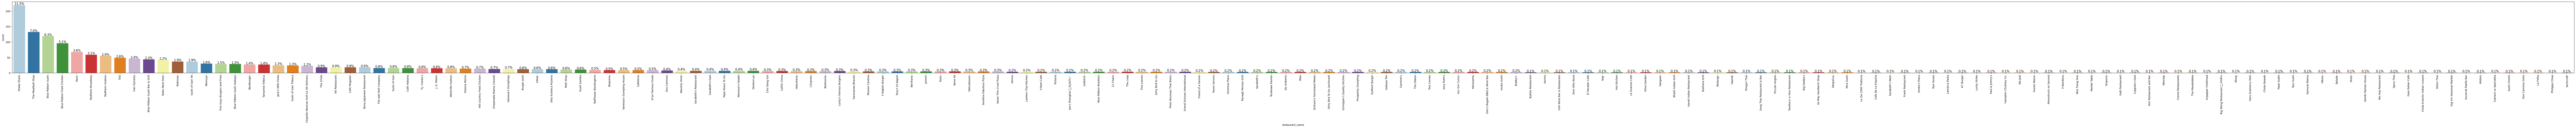

In [ ]:
labeled_bar(df, "restaurant_name", perc=True)

#### Observations:
* *The Shake Shack restaurant has the most orders (219 orders which represents 11.5% of all - 1898 orders).*
* *The Meatball Shop comes in second position with 7%.*
* *Follow Blue Ribbon Sushi and Blue Ribbon Fried Chicken with respectively 6.3% and 5.1%.*
* *The rest has less than 3.6% of orders.*

####2. Type of cuisine

<ipython-input-15-cb7d85f4914f>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


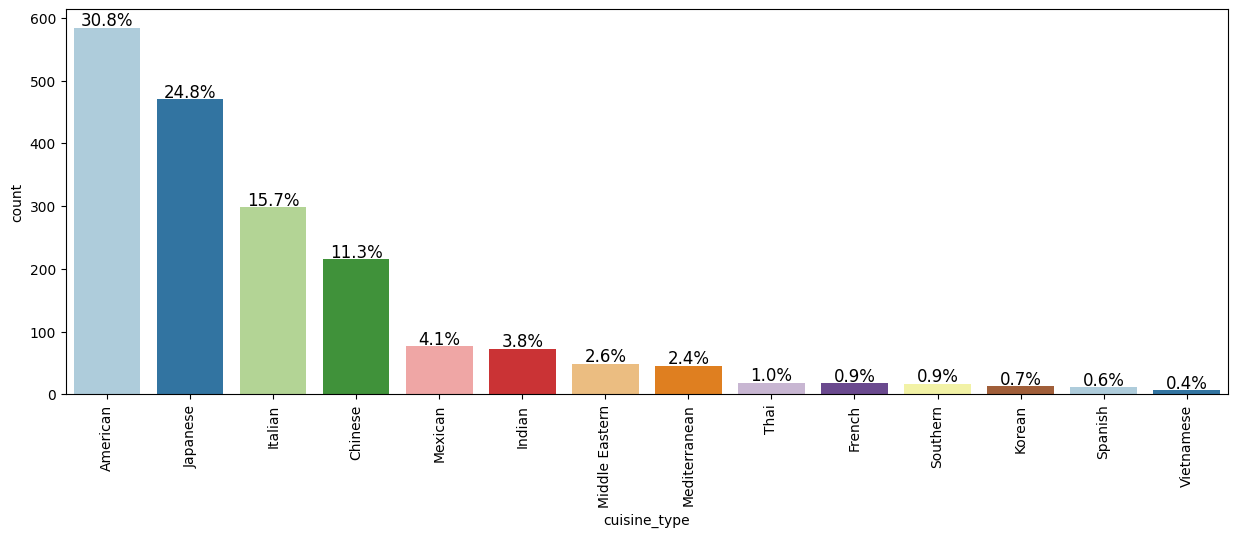

In [ ]:
labeled_bar(df, 'cuisine_type', perc=True)

#### Observations:
* *Customers are ordering more American food: 30.8% of overall - 1898 orders.*
* *Follow Japanese, Italian and Chinese food with respectively 24.8%, 15.7% and 11.3%.*
* *The rest has less than 3.8% of orders.*

####3. Day of the week

<ipython-input-15-cb7d85f4914f>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


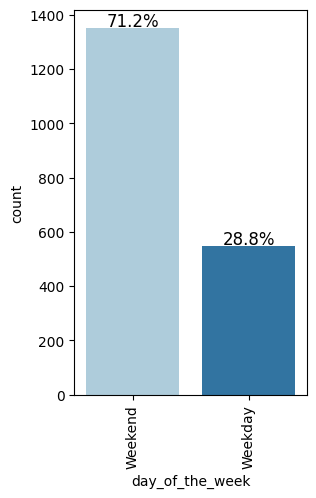

In [ ]:
labeled_bar(df, 'day_of_the_week', perc=True)

#### Observations:
* *71.2% of orders are placed on weekends and 28.8% on weekdays.*

####4. Rating

<ipython-input-15-cb7d85f4914f>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


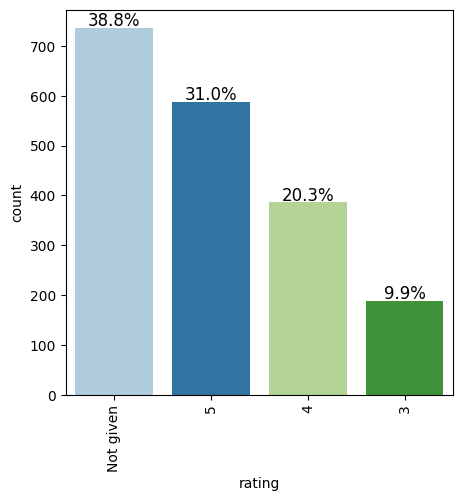

In [ ]:
labeled_bar(df, 'rating', perc=True)

#### Observations:
* *38.8% (736 customers) did not rate their orders.*
* *31% of customers rated 5 to their orders.*
* *20.3% rated 4 and 9.9% rated 3 to their orders.*

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [ ]:
# Compute the value count of the top 5 restaurants in term of the number of orders received
print("The top five restaurants in terms of the number of order received are:\n", df['restaurant_name'].value_counts()[:5])

The top five restaurants in terms of the number of order received are:
 restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


<ipython-input-15-cb7d85f4914f>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


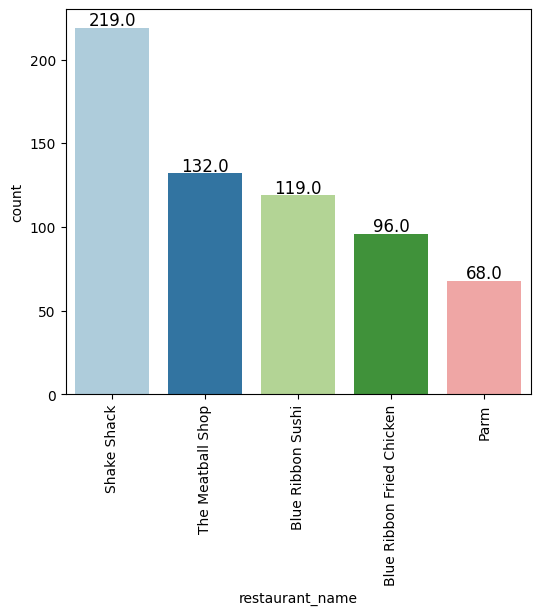

In [ ]:
# Create a new database in respect to the top 5 restaurants in term of the number of orders received and then plot bars
top5 = df['restaurant_name'].value_counts().index[:5]
df1 = df[df['restaurant_name'].isin(top5)]
labeled_bar(df1, 'restaurant_name', perc=False)

#### Observations:
Here are the top five restaurants in terms of the number of order received:
* Shake Shack: 219 orders;
* The Meatball Shop: 132 orders;
* Blue Ribbon Sushi: 119 orders;
* Blue Ribborn Fried Chicken: 96 orders;
* Parm: 68 orders.


### **Question 8**: Which is the most popular cuisine on weekends?

In [ ]:
# Create a data, df2, with cuisine_type and day_of_the_week
df2 = df[['cuisine_type', 'day_of_the_week']]

# Compute the most popular cuisine on weekends through a crosstab
pd.crosstab(index= df2['cuisine_type'], columns= df2['day_of_the_week']).sort_values(by = ["Weekend"], ascending=False)

day_of_the_week,Weekday,Weekend
cuisine_type,,
American,169,415
Japanese,135,335
Italian,91,207
Chinese,52,163
Mexican,24,53
Indian,24,49
Mediterranean,14,32
Middle Eastern,17,32
Thai,4,15


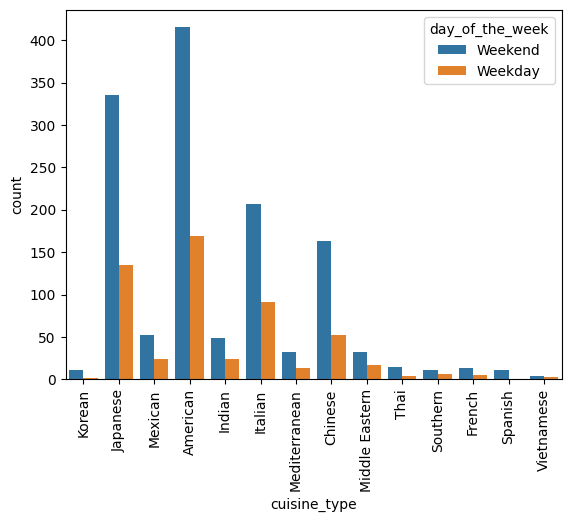

In [ ]:
# Plot the numbers of order by Cuisine Type and day of week
graph = sns.countplot(data=df,x='cuisine_type',hue='day_of_the_week')
plt.xticks(rotation=90, fontsize=10)
plt.show()

#### Observations: The most popular cuisine on weekends is the American one with 415 orders.


### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [ ]:
# if n1 = the number of the orders cost more than 20 dollars
# n = the number of orders
# then, the percentage of the orders cost more than 20 dollars is given by: 100*n1/n
n1 = df[df['cost_of_the_order']>20]['cost_of_the_order'].count()
n = df.shape[0]

print(round(100*n1/n, 2),'% of the orders cost more than 20 dollars.')

29.24 % of the orders cost more than 20 dollars.


#### Observations: 29.24% of the orders cost more than 20 dollars.


### **Question 10**: What is the mean order delivery time?

In [ ]:
# apply the mean function to delivery time to get the answer
print('It takes on average', round(df['delivery_time'].mean(),2), 'minutes to deliver an order.')


It takes on average 24.16 minutes to deliver an order.


#### Observations: The mean order delivery time is 24.16 minutes.


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [ ]:
# Find first the 3 most frequent customer and the number of orders they placed
df[['customer_id']].value_counts().head(3)


customer_id
52832          13
47440          10
83287           9
Name: count, dtype: int64


#### Observations: The 3 most frequent customers have the ID 52832, 47440 and 83287 with respectively 13, 10 and 9 orders placed.


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

####1. Continuous versus continuous


#####1.i. Correlation matrix

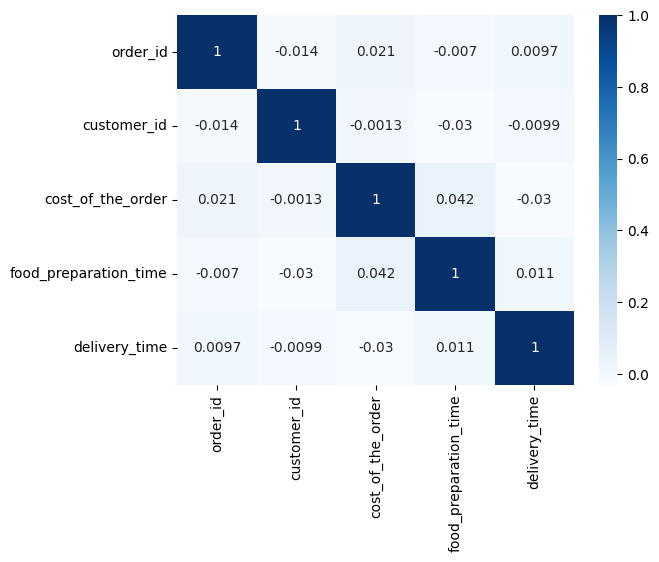

In [ ]:
sns.heatmap(df.corr(numeric_only=True), cmap="Blues", annot=True)
plt.show()

##### Observation: Though in this dataset, There is not any strong correlation between any two continuous variables.

#####1.ii. Pair plot


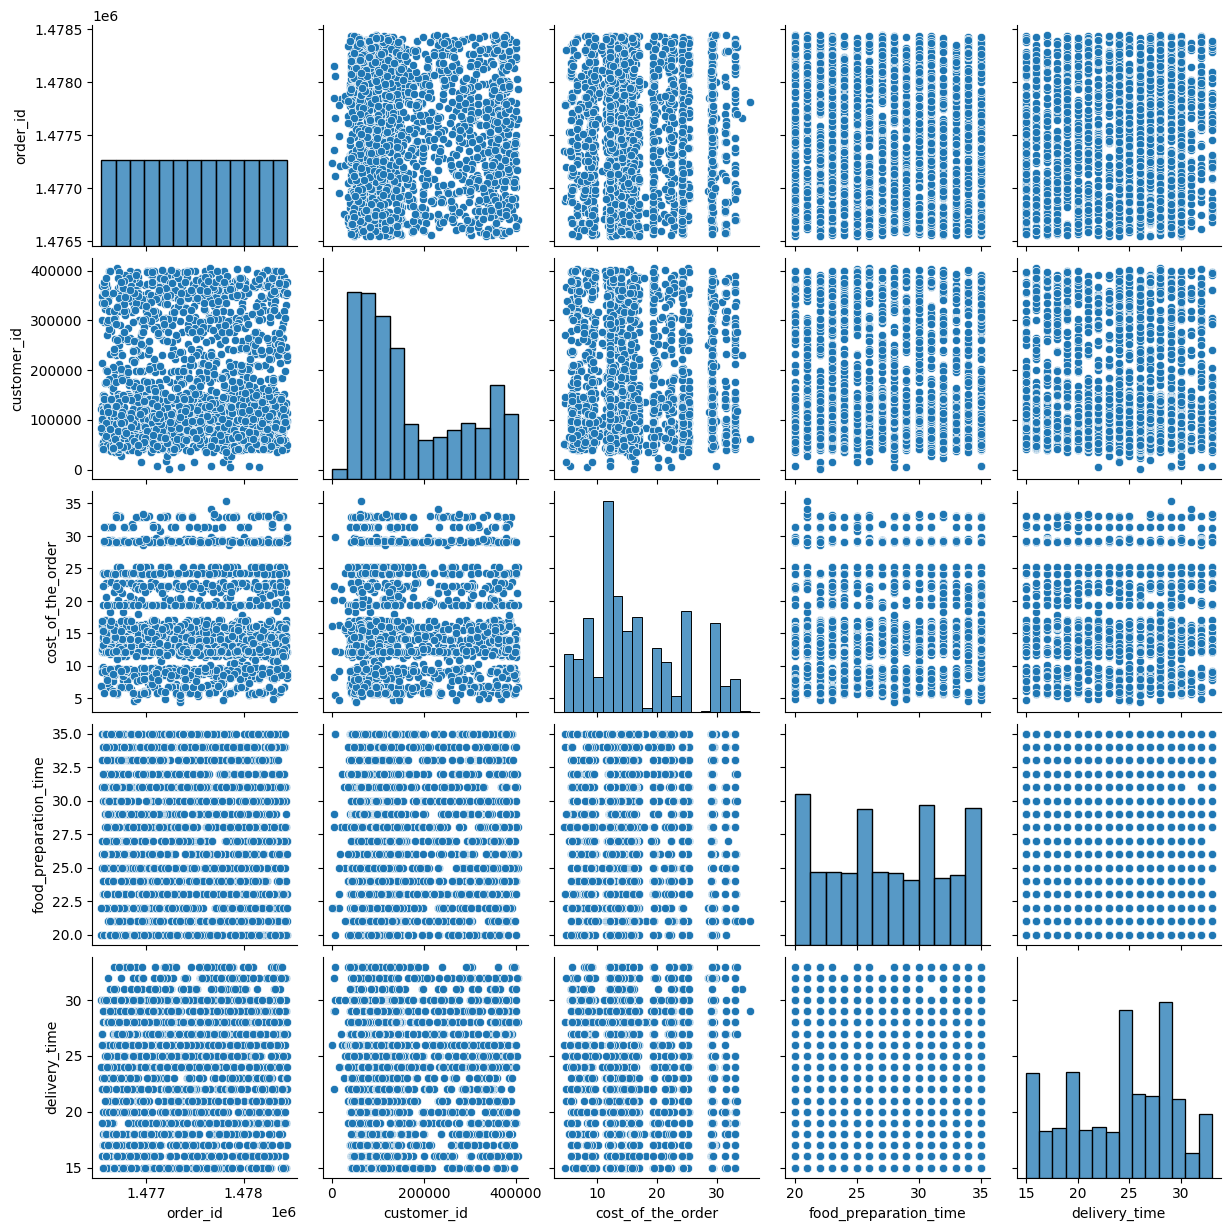

In [ ]:
sns.pairplot(df)
plt.show()

####2. Continuous versus categorical


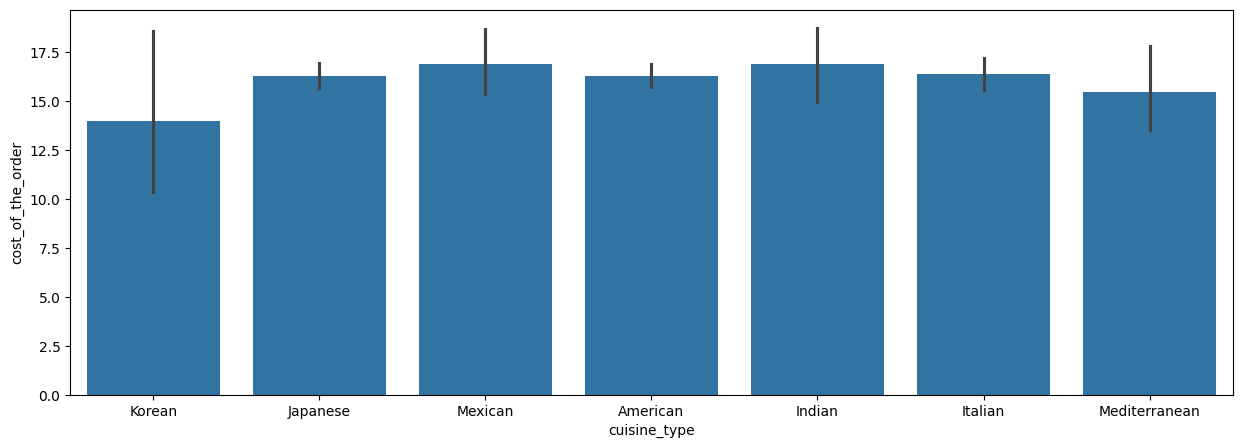

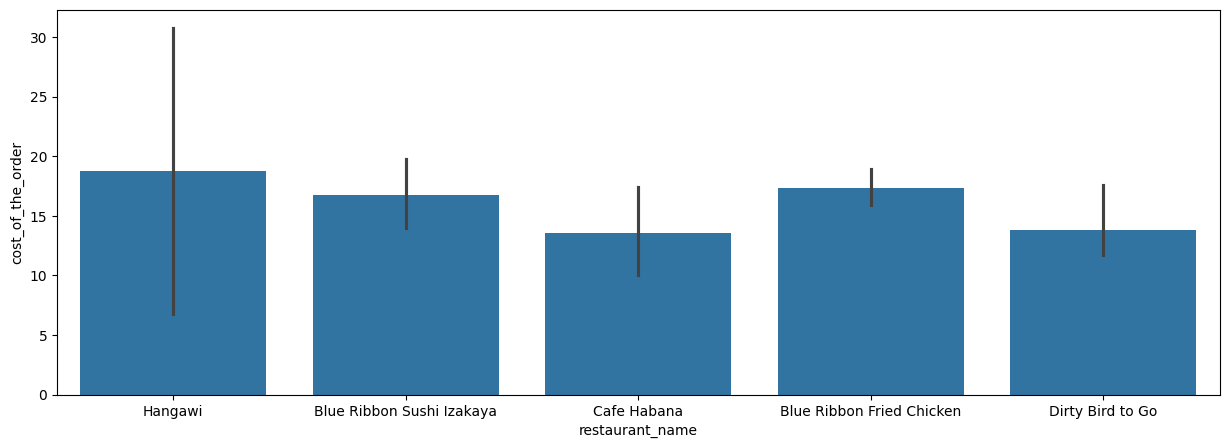

In [ ]:
plt.figure(figsize = (15,5))
sns.barplot(data = df, x = 'cuisine_type', y = 'cost_of_the_order', order = df.cuisine_type[:10])
plt.show()
print('\n')
plt.figure(figsize = (15,5))
sns.barplot(data = df, x = 'restaurant_name', y = 'cost_of_the_order', order = df.restaurant_name[:5])
plt.show()

##### Observation:
* The Highest average order costs within the top 10 is leading by French food
* Within the top 5 regarding the highest average order costs, Blue Ribbon Fried Chicken is the number one.

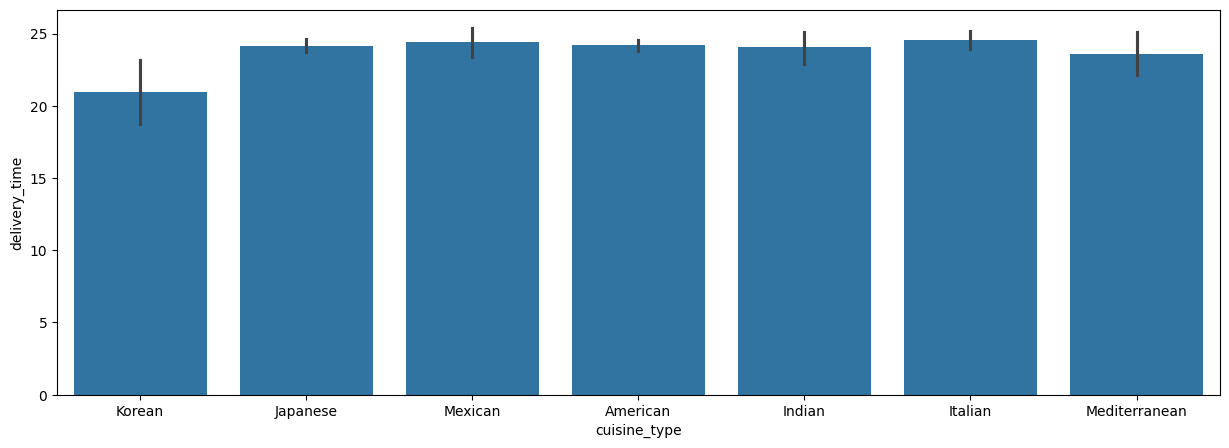

<Axes: xlabel='cuisine_type', ylabel='food_preparation_time'>

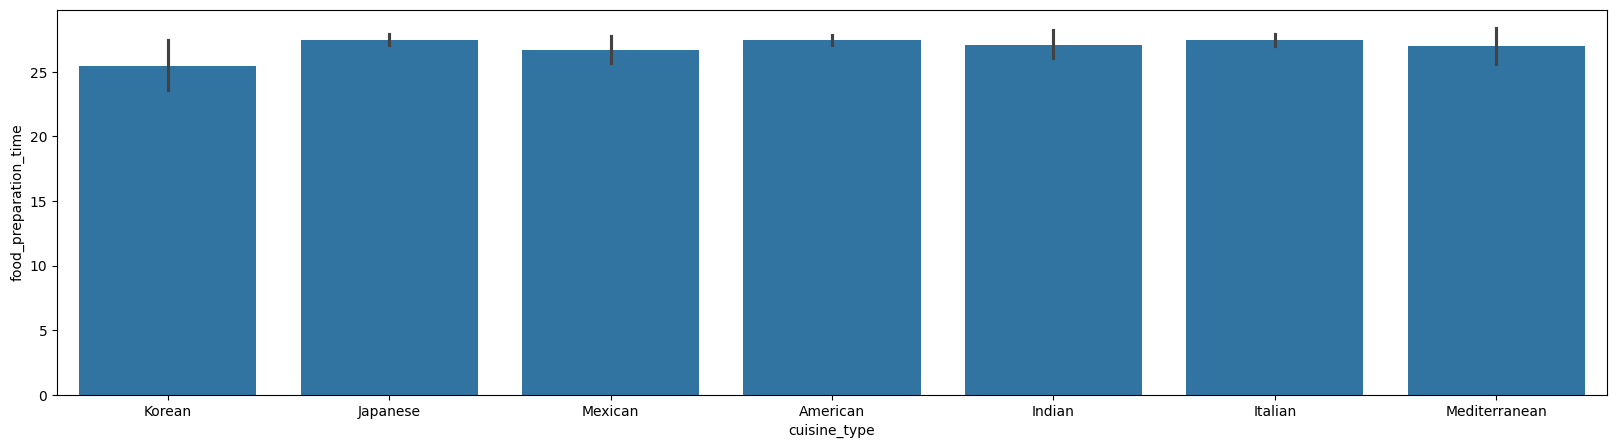

In [ ]:
plt.figure(figsize = (15,5))
sns.barplot(data = df, x = 'cuisine_type', y = 'delivery_time', order = df.cuisine_type[:10])
plt.show()
print('\n')
plt.figure(figsize = (20,5))
sns.barplot(data = df, x = 'cuisine_type', y = 'food_preparation_time', order = df.cuisine_type[:10])

##### Observation: No great variability in delivery and preparation time.


### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [ ]:
# Database with ratings more than 3
df3 = df.drop(df.index[(df['rating'] != '4') & (df['rating'] != '5')])

# Now count of restaurants with more than 50 ratings
a = df3['restaurant_name'].value_counts() > 50

# Display all the restaurants that fulfill the criteria by looking for those values equal to True
print('The restaurants fulfilling the criteria to get the promotional offer are:\n', a[a.values == True])


The restaurants fulfilling the criteria to get the promotional offer are:
 restaurant_name
Shake Shack                  True
The Meatball Shop            True
Blue Ribbon Sushi            True
Blue Ribbon Fried Chicken    True
Name: count, dtype: bool


#### Observations: The restaurant that have elligible for the promotional offer are:
* Shake Shack
* The Meatball Shop
* Blue Ribbon Sushi
* Blue Ribbon Fried Chicken


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [ ]:
revenue = 0
income = 0
# Create a Pandas series of the cost_of_the_order column
#cost = pd.Series(df['cost_of_the_order'])

c = df.cost_of_the_order.values.tolist()

# Loop through the series calculating the individual income component and adding it to the revenue variable
for i in range(len(c)):
    if (c[i] > 5) & (c[i] < 20):
        income = c[i]*0.15
    elif (c[i] > 20):
        income = c[i]*0.25
    else:
        income = 0
    revenue = revenue + income

print('The revenue generated by the company accross all orders is:',round(revenue, 2),'$')


The revenue generated by the company accross all orders is: 6166.3 $


#### Observations: 6166.3$ is the revenue generated by the company accross all orders.


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [ ]:
# Add a new column to the dataset containing the total time required for food preparation and delivery
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# Compute the percentage of orders taking more than 60 minutes
n = df.shape[0] # number of orders
ordertime_above_60 = df['total_time'][df['total_time']> 60].count()

print(round((ordertime_above_60/n)*100,2),'% of the placed orders take more than 60 minutes.')


10.54 % of the placed orders take more than 60 minutes.


#### Observations: 10.54% of the placed orders take more than 60 minutes to be delivered.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [ ]:
# create two datasets where day_of_the_week equals Weekday and Weekend respectively
# Separate the data for weekdays and weekends
weekday_df = df[df['day_of_the_week'] == 'Weekday']
weekend_df = df[df['day_of_the_week'] == 'Weekend']

# Compute the mean delivery time regarding weekday and weekend using the new datasets above
print()
m_weekday = weekday_df['delivery_time'].mean()
m_weekend = weekend_df['delivery_time'].mean()

# Print the mean delivery time for weekdays and weekends
print
print("Mean Delivery Time")
print("Weekdays: {:.2f} minutes".format(m_weekday))
print("Weekends: {:.2f} minutes".format(m_weekend))
print('The variation of the mean delivery time during weekdays and weekends:', round(abs(m_weekday - m_weekend),2), 'minutes.')

# The average delivery time on weekdays is greater than during the weekend. Some reasons why this is the case may include
# Traffic conditions/congestion during the weekday is worst than on the weekend.
# Fewer FoodHub delivery employees during the weekday.



Mean Delivery Time
Weekdays: 28.34 minutes
Weekends: 22.47 minutes
The variation of the mean delivery time during weekdays and weekends: 5.87 minutes.


#### Observations: The mean delivery time during weekends and weekdays vary from 5.87 minutes. To be more precise, the mean delivery time during weekends is 22.47 minutes and 28.34 minutes on weekdays. This observed difference may be due to more congestion on weekdays. Since there are more orders on weekdays than on weekends (see question 3), this could also be explained by the insufficiency of delivery means to compensate for all these orders.


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

### Conclusions:
* 736 orders out of 1898 (about 39%) did not provide a rating
* When rated, most of customers are given 5 or 4 (974 or 84%).
* American, Japanese, Italian and Chinese are the big four in order to the number of orders.
* Delivery time during weekdays take, on average, almost 6 minutes longer than during weekends, yet we have fewer orders on weekends than on weekdays.


### Recommendations:

*  Improve the rating system so that everyone can rate their order (perhaps hire customer service to do this)
* Bring other restaurants to be competitive perhaps by providing them with subsidies and training on prospecting
* Equip restaurants with sufficient means of delivery to compensate for an exponential number of orders

---